# Exploring differences of Bessel and Anger functions
$J_\omega(x) = \frac{1}{\pi}\int_0^\pi\cos(\omega\theta-x\sin(\theta))d\theta - \frac{\sin(\omega\pi)}{\pi}\int_0^\infty e^{-x\sinh(t)-\omega t}dt$

is the Bessel, and Anger is the simpler integral

$\textbf{J}_\omega(x) = \frac{1}{\pi}\int_0^\pi\cos(\omega\theta-x\sin(\theta))d\theta$

The following will explore the differences for real $k$ and complex $\omega$, the case which appears in the plasma response function under consideration

In [32]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pyvista as pv

plt.style.use('dark_background')

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

%matplotlib inline

In [2]:
# Will use 50-pt gauss-legendre quadrature method with vectorized evaluation
quad_arr = np.array([[1, -0.9988664044200710501855,  0.002908622553155140958],
    [2,   -0.994031969432090712585,    0.0067597991957454015028],
    [3,   -0.985354084048005882309,   0.0105905483836509692636],
    [4,   -0.9728643851066920737133,   0.0143808227614855744194],
    [5,   -0.9566109552428079429978,   0.0181155607134893903513],
    [6,   -0.9366566189448779337809,   0.0217802431701247929816],
    [7,   -0.9130785566557918930897,   0.02536067357001239044],
    [8,   -0.8859679795236130486375,   0.0288429935805351980299],
    [9,   -0.8554297694299460846114,   0.0322137282235780166482],
    [10,  -0.821582070859335948356,    0.0354598356151461541607],
    [11,  -0.784555832900399263905,    0.0385687566125876752448],
    [12,  -0.744494302226068538261,    0.041528463090147697422],
    [13,  -0.70155246870682225109,    0.044327504338803275492],
    [14,  -0.6558964656854393607816,   0.0469550513039484329656],
    [15,  -0.6077029271849502391804,   0.0494009384494663149212],
    [16,  -0.5571583045146500543155,   0.0516557030695811384899],
    [17,  -0.5044581449074642016515,   0.0537106218889962465235],
    [18,  -0.449806334974038789147,   0.05555774480621251762357],
    [19,  -0.3934143118975651273942,   0.057189925647728383723],
    [20,  -0.335500245419437356837,    0.058600849813222445835],
    [21,  -0.2762881937795319903276,   0.05978505870426545751],
    [22,  -0.2160072368760417568473,   0.0607379708417702160318],
    [23,  -0.1548905899981459020716,   0.06145589959031666375641],
    [24,  -0.0931747015600861408545,   0.0619360674206832433841],
    [25,  -0.0310983383271888761123,   0.062176616655347262321],
    [26,  0.0310983383271888761123,    0.062176616655347262321],
    [27,  0.09317470156008614085445,   0.0619360674206832433841],
    [28,  0.154890589998145902072,    0.0614558995903166637564],
    [29,  0.2160072368760417568473,    0.0607379708417702160318],
    [30,  0.2762881937795319903276,    0.05978505870426545751],
    [31,  0.335500245419437356837,    0.058600849813222445835],
    [32,  0.3934143118975651273942,    0.057189925647728383723],
    [33,  0.4498063349740387891471,    0.055557744806212517624],
    [34,  0.5044581449074642016515,    0.0537106218889962465235],
    [35,  0.5571583045146500543155,    0.05165570306958113849],
    [36,  0.60770292718495023918,     0.049400938449466314921],
    [37,  0.6558964656854393607816,    0.046955051303948432966],
    [38,  0.7015524687068222510896,    0.044327504338803275492],
    [39,  0.7444943022260685382605,    0.0415284630901476974224],
    [40,  0.7845558329003992639053,    0.0385687566125876752448],
    [41,  0.8215820708593359483563,    0.0354598356151461541607],
    [42,  0.8554297694299460846114,    0.0322137282235780166482],
    [43,  0.8859679795236130486375,    0.02884299358053519803],
    [44,  0.9130785566557918930897,    0.02536067357001239044],
    [45,  0.9366566189448779337809,    0.0217802431701247929816],
    [46,  0.9566109552428079429978,    0.0181155607134893903513],
    [47,  0.9728643851066920737133,    0.0143808227614855744194],
    [48,  0.985354084048005882309,    0.010590548383650969264],
    [49,  0.9940319694320907125851,    0.0067597991957454015028],
    [50,  0.9988664044200710501855,    0.0029086225531551409584]])

In [70]:
# Anger: Define integrand
def integrand(quads, om, x):
    # affine transformation to prepare quad method quads=[-1,1] -> [0, pi]
    theta = 0.5 * np.pi * (1.0 + quads)
    # build integrand, shape (quad points, real om, imag om, k)
    # compute product theta * omega, 
    t_f = np.tensordot(np.tensordot(theta, om, axes=0),
                       np.ones_like(x), axes=0)
    # compute product x * sin(theta)
    x_sint = np.tensordot(np.sin(theta),
                          np.tensordot(np.ones_like(om), x, axes=0), axes=0)
    # compute cos(theta*omega - x*sin(theta))
    return np.cos(t_f - x_sint)
 
# make grids for plotting
k = np.linspace(-1.0, 10.0, num=100)
om_r = np.linspace(-3.0, 5.0, num=100) # np.linspace(3.2, 3.4, num=75) 
om_i = np.linspace(0.0, 5.0, num=50) # np.linspace(0.19, 0.2, num=75) # 
om = ( np.tensordot(om_r, np.ones_like(om_i), axes=0) + 
      1.0j*np.tensordot(np.ones_like(om_r), om_i, axes=0) )

# Compute anger function using GL quadrature
integrand_on_quads = integrand(quads=quad_arr[:, 1], om=om, x=k)
f1 = 0.5 * np.pi # quad scaling factor from [0, pi] -> [-1, 1] and norm of integral form
result = f1 * np.tensordot(quad_arr[:, 2], integrand_on_quads, axes=([0], [0]))
anger = result / np.pi
# Also compute bessel function ?
print(result.shape)

(100, 50, 100)


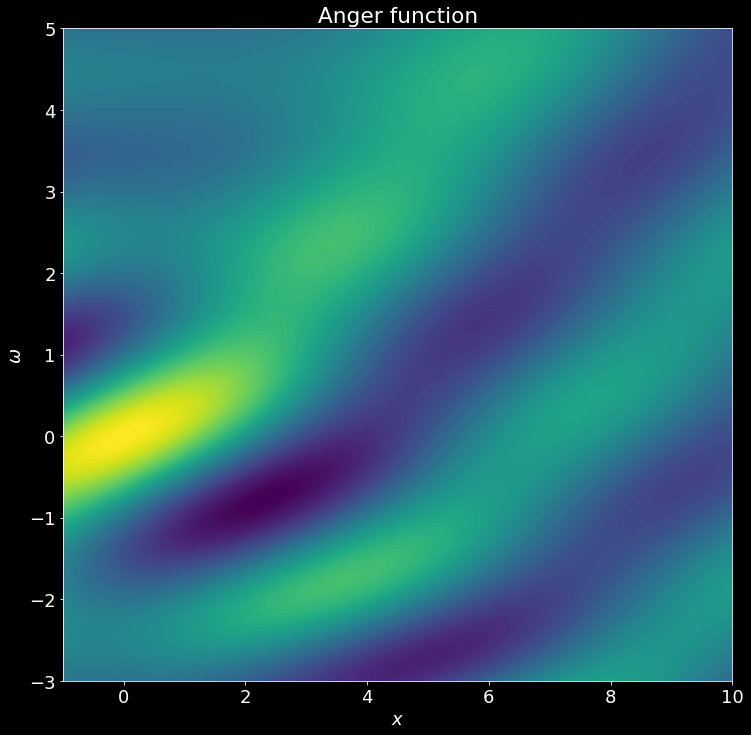

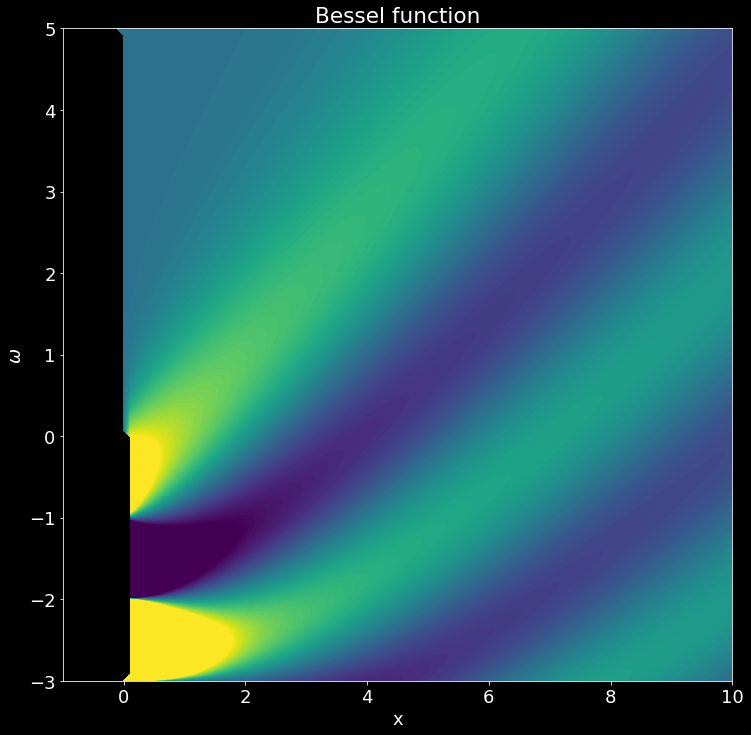

In [75]:
# 2grids for plotting
k2 = np.tensordot(k, np.ones_like(om_r), axes=0)
o2 = np.tensordot(np.ones_like(k), om_r, axes=0)

# colorbars
# anger2 = anger / sp.sinc(om[:, :, None])
max_r = np.amax(np.real(anger[:, 0, :]))
min_r = np.amin(np.real(anger[:, 0, :]))
cb = np.linspace(min_r, max_r, num=100)

bessel = sp.jv(o2, k2)
max_b = np.nanmax(bessel)
min_b = np.nanmin(bessel)
cb_b = np.linspace(min_b, max_b, num=100)

plt.close('all')

plt.figure()
# plt.contourf(k2, o2, np.real(anger2[:, 0, :].T), cb, extend='both')
plt.contourf(k2, o2, np.real(anger[:, 0, :].T), cb, extend='both')
plt.xlabel(r'$x$')
plt.ylabel(r'$\omega$')
plt.title('Anger function')

plt.figure()
plt.contourf(k2, o2, bessel, cb, extend='both')
plt.xlabel(r'x')
plt.ylabel(r'$\omega$')
plt.title('Bessel function')

plt.show()

## Conclusion: Anger is essentially a regularized Bessel function

In [57]:
# 3d grids as repeated outer product of vectors
def grid3d(arr0, arr1, arr2):
    return np.tensordot(arr0, np.tensordot(arr1, arr2, axes=0), axes=0)


# 3 grids
x3 = grid3d(om_r, np.ones_like(om_i), np.ones_like(k))
y3 = grid3d(np.ones_like(om_r), om_i, np.ones_like(k))
z3 = grid3d(np.ones_like(om_r), np.ones_like(om_i), k)

grid = pv.StructuredGrid(x3, y3, z3)
# set grid data as flattened scalar data (grid data is always flat)
grid['data'] = np.real(result).transpose().flatten()
contour0 = grid.contour(cb)  # [0.9 * min_r, 0.9 * max_r])
# grid['data'] = np.imag(result).transpose().flatten()
# contour1 = grid.contour([0])

p = pv.PlotterITK()
# add mesh to the interactive plotter 
p.add_mesh(contour0)
# p.add_mesh(contour1)
p.show()

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…